In [478]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
resv = pd.read_csv('YoY_Seated_Diner_Data.csv')

In [479]:
#separate dataframe into cities, states and countries
#Disclaimer: OpenTable did not provide data on all cities, states and countries 
country = resv[resv.Type=='country']
states= resv[resv.Type == 'state']
city = resv[resv.Type == 'city']

In [481]:
states.describe() #row indices are states, columns are dates of OpenTable data

,2/18,2/19,2/20,2/21,2/22,2/23,2/24,2/25,2/26,2/27,...,5/25,5/26,5/27,5/28,5/29,5/30,5/31,6/1,6/2,6/3
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.408163,9.938776,-1.836735,-0.938776,5.571429,6.612245,2.775510,1.918367,-1.551020,-3.734694,...,-85.408571,-83.410408,-81.851633,-82.766531,-80.971429,-80.149184,-81.458367,-78.045510,-78.432857,-75.451429
std,13.346220,21.112208,7.194752,5.814523,23.584069,12.094793,13.384172,13.141595,11.131901,7.474332,...,15.837794,16.459815,16.945146,15.441271,16.547236,16.357125,15.287183,19.735226,18.179465,19.826736
min,-19.000000,-18.000000,-30.000000,-15.000000,-7.000000,-14.000000,-12.000000,-14.000000,-27.000000,-21.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-99.700000,-100.000000,-100.000000
25%,-4.000000,-2.000000,-5.000000,-5.000000,-2.000000,0.000000,-2.000000,-4.000000,-9.000000,-8.000000,...,-99.890000,-99.110000,-98.790000,-98.670000,-98.260000,-97.660000,-96.970000,-96.280000,-95.610000,-93.650000
50%,2.000000,2.000000,-1.000000,-1.000000,2.000000,4.000000,1.000000,1.000000,-1.000000,-3.000000,...,-93.500000,-86.650000,-83.440000,-83.290000,-81.130000,-82.290000,-81.360000,-77.960000,-79.160000,-75.610000
75%,8.000000,11.000000,2.000000,4.000000,6.000000,11.000000,4.000000,5.000000,5.000000,1.000000,...,-73.110000,-72.210000,-67.290000,-71.060000,-68.850000,-67.390000,-71.330000,-66.990000,-67.880000,-61.740000
max,51.000000,70.000000,9.000000,10.000000,163.000000,60.000000,80.000000,78.000000,40.000000,10.000000,...,-51.260000,-33.230000,-33.570000,-50.260000,-48.030000,-48.280000,-41.930000,-11.460000,-21.680000,-21.710000


In [420]:
resv.Type.value_counts() #Breakdown of number of cities, states, and countries OpenTable Collected data on

state      49
city       48
country     8
Name: Type, dtype: int64

Text(0.5,0.04,'Source: opentable.com/state-of-industry')

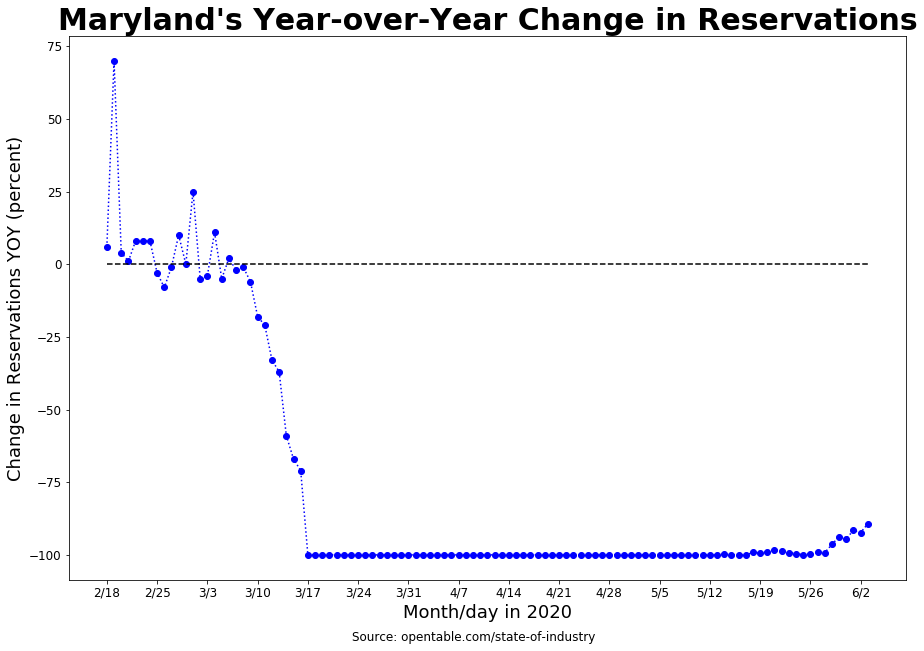

In [484]:
plt.figure(figsize = (15,10))
plt.plot(np.transpose(states[states.Name=='Maryland'])[2:],'bo:',np.array([0 for zero in range(len(np.transpose(states[states.Name =='Maryland'])[2:]))]),
         'k--',) #Using the transpose so reservation dates become rows
plt.xticks(states[states.Name=='Maryland'].columns[2::7],fontsize = 12) #Separating the xticks by week to make less cluttered
plt.yticks(fontsize = 12)
plt.title("Maryland's Year-over-Year Change in Reservations",fontsize = 30,fontweight = 'bold')
plt.xlabel('Month/day in 2020', fontsize = 18)
plt.ylabel('Change in Reservations YOY (percent)',fontsize = 18)
plt.figtext(0.5, 0.04, 'Source: opentable.com/state-of-industry', wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5,0.04,'Source: opentable.com/state-of-industry')

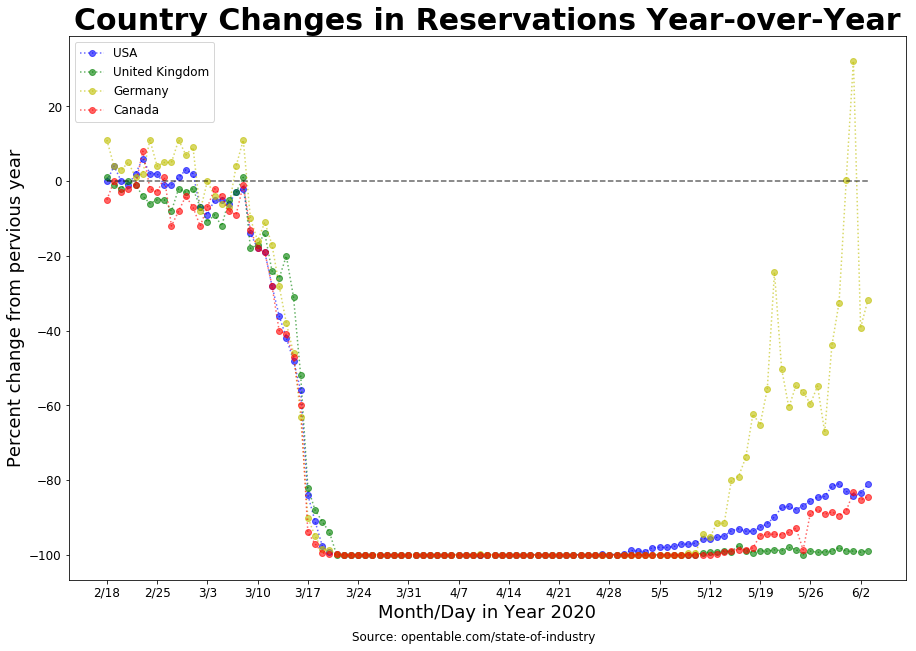

In [487]:
usa = country[country.Name == 'United States']
uk = country[country.Name == 'United Kingdom']
ger = country[country.Name =='Germany']
can = country[country.Name =='Canada']
plt.figure(figsize = (15,10))
plt.plot(np.transpose(usa)[2:],'bo:',np.transpose(uk)[2:],'go:',np.transpose(ger)[2:],'yo:',np.transpose(can)[2:],'ro:',
         np.array([0 for zero in range(len(np.transpose(country[country.Name =='United Kingdom'])[2:]))]),
         'k--',alpha = 0.6)
plt.xticks(usa.columns[2::7],fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Country Changes in Reservations Year-over-Year',fontsize = 30, fontweight = 'bold')
plt.legend(('USA','United Kingdom','Germany','Canada'),loc = 'upper left',fontsize = 12)
plt.xlabel('Month/Day in Year 2020',fontsize = 18)
plt.ylabel('Percent change from pervious year',fontsize = 18)
plt.figtext(0.5, 0.04, 'Source: opentable.com/state-of-industry', wrap=True, horizontalalignment='center', fontsize=12)


In [463]:
hou = np.transpose(city[city.Name == 'Houston'])[2:]
bal = np.transpose(city[city.Name == 'Baltimore'])[2:]
nyc = np.transpose(city[city.Name == 'New York'])[2:]
sea = np.transpose(city[city.Name == 'Seattle'])[2:]
mia = np.transpose(city[city.Name == 'Miami'])[2:]
la = np.transpose(city[city.Name == 'Los Angeles'])[2:]
no = np.transpose(city[city.Name == 'New Orleans'])[2:]

Text(0.5,0.04,'Source: opentable.com/state-of-industry')

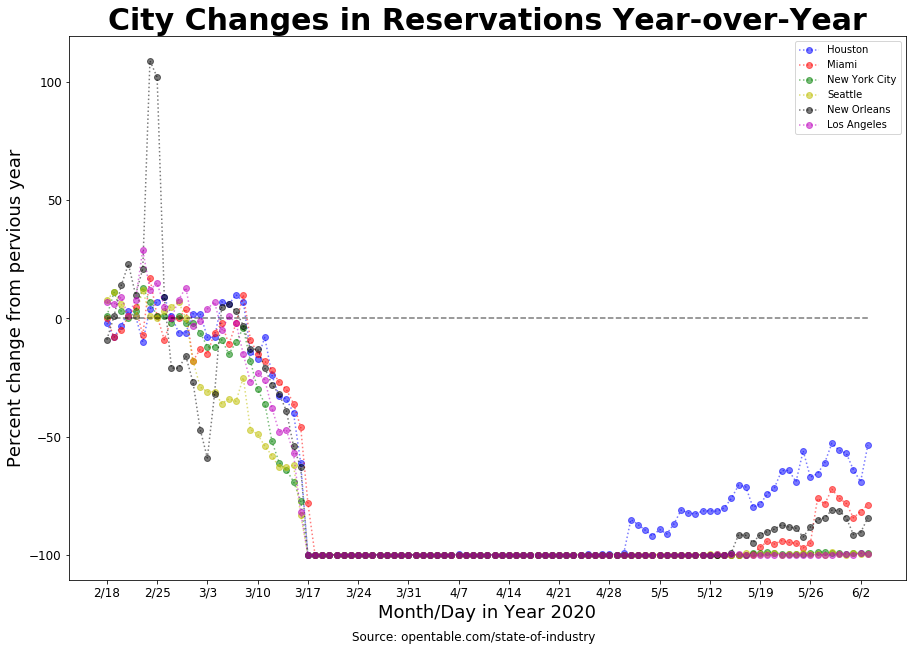

In [468]:
plt.figure(figsize = (15,10))
plt.plot(hou,'bo:',mia,'ro:',nyc,'go:',sea,'yo:',no,'ko:',
         la,'mo:',
         np.array([0 for zero in range(len(np.transpose(city[city.Name =='Baltimore'])[2:]))]),
         'k--',alpha = 0.52)
plt.xticks(usa.columns[2::7],fontsize = 12)
plt.xticks(usa.columns[2::7],fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('City Changes in Reservations Year-over-Year',fontsize = 30, fontweight = 'bold')
plt.legend(('Houston','Miami','New York City','Seattle','New Orleans','Los Angeles'),loc = 'upper right')
plt.xlabel('Month/Day in Year 2020',fontsize = 18)
plt.ylabel('Percent change from pervious year',fontsize = 18)
plt.figtext(0.5, 0.04, 'Source: opentable.com/state-of-industry', wrap=True, horizontalalignment='center', fontsize=12)

In [473]:
tx = np.transpose(states[states.Name == 'Texas'])[2:]
pa = np.transpose(states[states.Name == 'Pennsylvania'])[2:]
ny = np.transpose(states[states.Name == 'New York'])[2:]
nj = np.transpose(states[states.Name == 'New Jersey'])[2:]
fl = np.transpose(states[states.Name == 'Florida'])[2:]
ca = np.transpose(states[states.Name == 'California'])[2:]
mi = np.transpose(states[states.Name == 'Michigan'])[2:]

Text(0.5,0.04,'Source: opentable.com/state-of-industry')

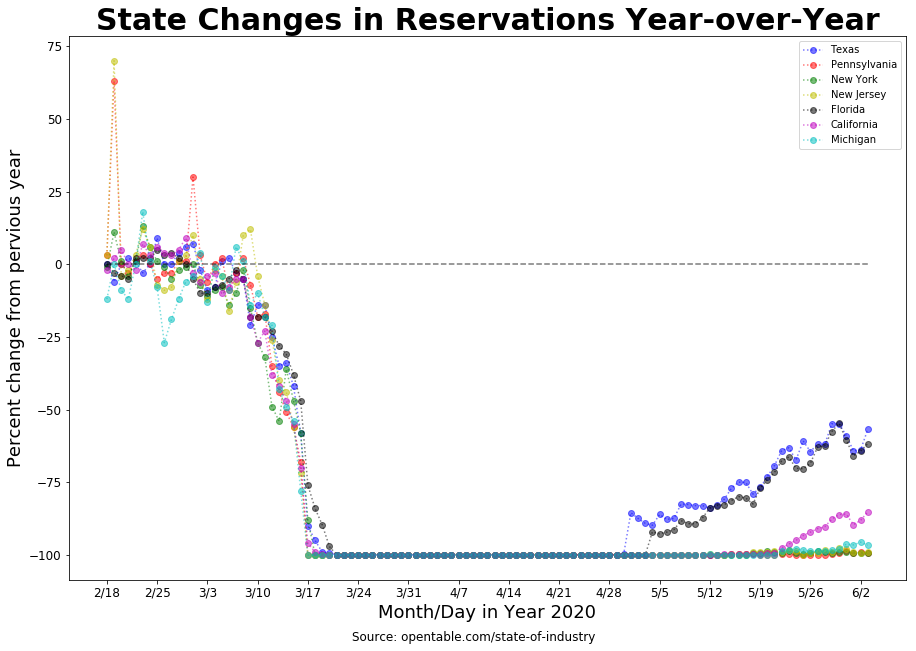

In [476]:
plt.figure(figsize = (15,10))
plt.plot(tx,'bo:',pa,'ro:',ny,'go:',nj,'yo:',fl,'ko:',
         ca,'mo:', mi,'co:',
         np.array([0 for zero in range(len(np.transpose(city[city.Name =='Baltimore'])[2:]))]),
         'k--',alpha = 0.52)
plt.xticks(usa.columns[2::7],fontsize = 12)
plt.xticks(usa.columns[2::7],fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('State Changes in Reservations Year-over-Year',fontsize = 30, fontweight = 'bold')
plt.legend(('Texas','Pennsylvania','New York','New Jersey','Florida','California', 'Michigan'),loc = 'upper right')
plt.xlabel('Month/Day in Year 2020',fontsize = 18)
plt.ylabel('Percent change from pervious year',fontsize = 18)
plt.figtext(0.5, 0.04, 'Source: opentable.com/state-of-industry', wrap=True, horizontalalignment='center', fontsize=12)

In [477]:
def resv_plot(land,name):  #land is either a city, state or country. Name is the city/state/country name to extract data from
    geo = resv[resv.Type == land]
    if land not in ['city','state','country']:
        print('land argument must be either: city, state or country and formatted as a string')
    else:
        n = geo[geo.Name == name]
        
        try:
            plt.figure(figsize = (15,10))
            plt.plot(np.transpose(n)[2:],'o:' ,np.array([0 for zero in range(len(np.transpose(n)[2:]))]),'k:')
            plt.xticks(geo.columns[2::7],fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.title('{} Changes in Reservations Year-over-Year'.format(name),fontsize = 30, fontweight = 'bold')
            plt.xlabel('Month/Day in Year 2020',fontsize = 18)
            plt.ylabel('Percent change from pervious year',fontsize = 18)
            plt.figtext(0.5, 0.04, 'Source: opentable.com/state-of-industry', wrap=True, horizontalalignment='center', fontsize=12)

        except ZeroDivisionError:
            print('{} is not in the OpenTable dataset'.format(land.capitalize()))
        

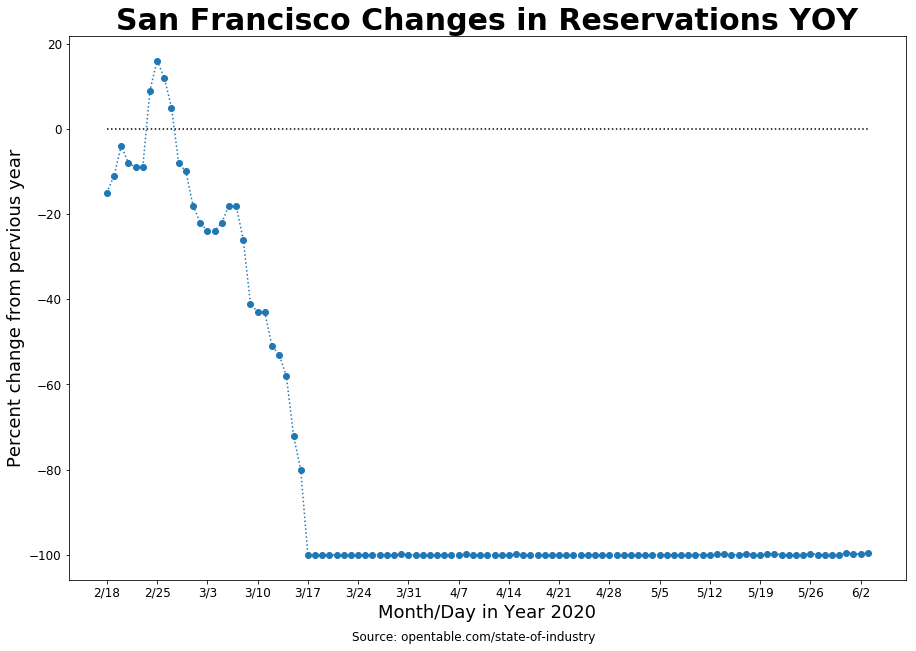

In [436]:
resv_plot('city','San Francisco')